## Read data

In [6]:
import jsonlines as jsonl

subtasks = []
for i in range(1,4):
    json_data = jsonl.open('data/2023/subtask'+str(i)+'/train_text.json')

    data = {}
    for line in json_data:
        author    = line['twitter user id']
        texts     = [inst['text'] for inst in line['texts']]
        tweet_ids = [inst['tweet id'] for inst in line['tweet ids']]

        data[author] = dict( zip(tweet_ids, texts) )
    
    subtasks.append(data)

## Check size of dataset

In [7]:
from nltk.tokenize import TweetTokenizer

In [8]:
tokenizer = TweetTokenizer()

print('--------------------------------------------------\n')
for i in range(3):
    data = subtasks[i]
    
    num_authors = len(data.keys())
    
    all_text = ''
    total_tweets = 0
    for author in data.keys():
        total_tweets += len(data[author])
        for text in data[author].values():
            all_text += ' ' + text
    
    num_tokens = len(tokenizer.tokenize(all_text))
    
    print('Subtask '+str(i+1)+'. authors: '+str(num_authors)+', tweets: '+str(total_tweets)+',  tokens: '+str(num_tokens)+', avg tweet sz: '+str(num_tokens/total_tweets)+'\n')
print('\n--------------------------------------------------')

--------------------------------------------------

Subtask 1. authors: 160, tweets: 1064,  tokens: 25923, avg tweet sz: 24.36372180451128

Subtask 2. authors: 320, tweets: 320,  tokens: 8538, avg tweet sz: 26.68125

Subtask 3. authors: 256, tweets: 256,  tokens: 7053, avg tweet sz: 27.55078125


--------------------------------------------------


In [9]:
S

NameError: name 'S' is not defined

In [10]:
import matplotlib.pyplot as plt

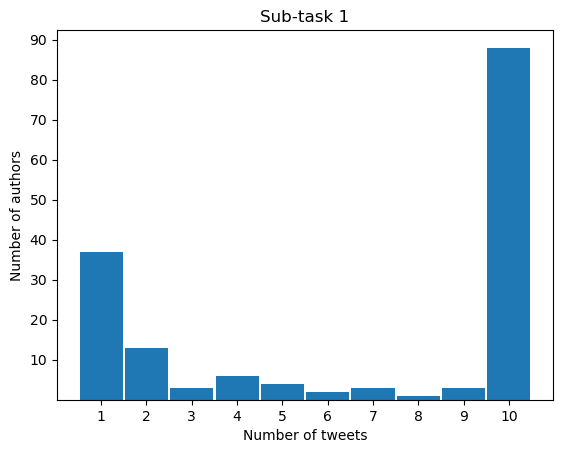

In [11]:
data = subtasks[0]

num_tweets = [len(data[author]) for author in list(data.keys())] 

n, bins, patches = plt.hist(x = num_tweets, bins = 10, align = 'mid', range = (0.5,10.5), rwidth = 0.95)

plt.xlabel('Number of tweets')
plt.ylabel('Number of authors')
plt.xticks(range(1,11))
plt.yticks(range(10, int(n.max()) + 10, 10))
plt.title('Sub-task 1')

plt.show()

## Labels

In [12]:
subtasks_truth = []
for i in range(1,4):
    json_data = jsonl.open('data/2023/subtask'+str(i)+'/train_truth.json')
    
    labels = {}
    for line in json_data:
        labels[ line['twitter user id'] ] = line['class']
        
    subtasks_truth.append(labels)

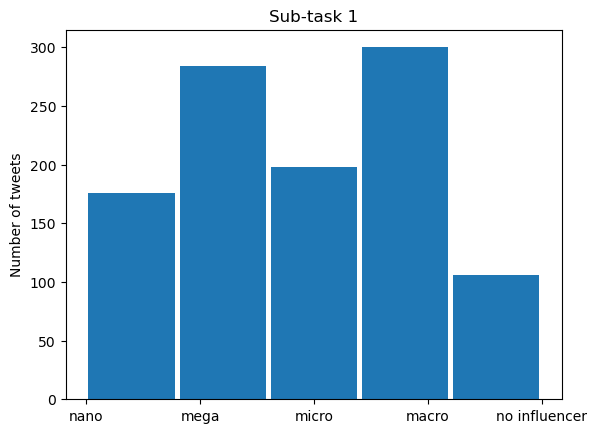

In [13]:

data  = subtasks[0]
truth = subtasks_truth[0]

label_array = []
for author in list(data.keys()):
    label_array += [truth[author]]*len(data[author])

n, bins, patches = plt.hist(x = label_array, bins = len(set(truth.values())), align = 'mid', rwidth = 0.95)

plt.ylabel('Number of tweets')

plt.title('Sub-task 1')

plt.show()

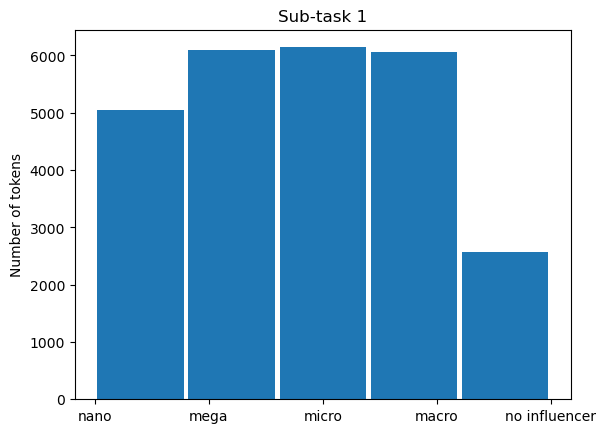

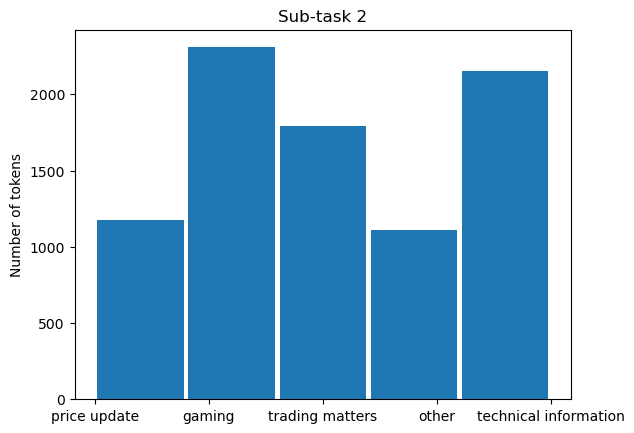

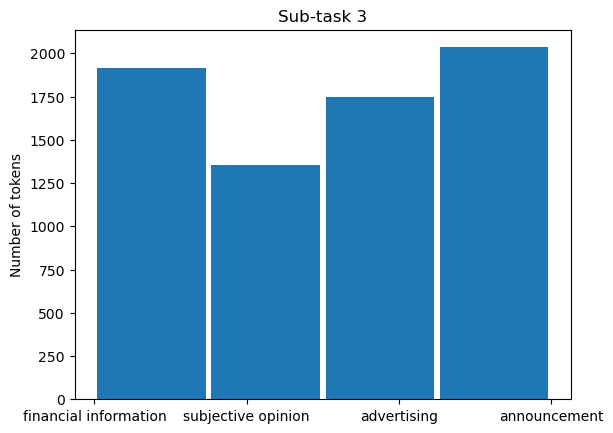

In [14]:
for i in range(3):
    data  = subtasks[i]
    truth = subtasks_truth[i]

    token_array = []
    for author in list(data.keys()):
        author_text = ''
        for text in data[author].values():
            author_text += ' ' + text
            
        token_array += [truth[author]]*len( tokenizer.tokenize(author_text) )

    n, bins, patches = plt.hist(x = token_array, bins = len(set(truth.values())), align = 'mid', rwidth = 0.95)

    plt.ylabel('Number of tokens')

    plt.title('Sub-task '+str(i+1))

    plt.show()